# Cardio Good Fitness Project: 
## Submitted by: Tomydas Pall

# Objective: 
Preliminary Data Analysis. Explore the dataset and practice extracting basic observations about the data. 

# Key tasks:

1. Come up with a customer profile (characteristics of a customer) of the different products
2. Perform univariate and multivariate analyses
3. Generate a set of insights and recommendations that will help the company in targeting new customers

# Dataset:
## File Name: CardioGoodFitness.csv

1. Product - The model no. of the treadmill
2. Age -  Age of the customer in no of years
3. Gender - Gender of the customer
4. Education - Education of the customer in no. of years
5. Marital Status - Marital status of the customer
6. Usage - Avg. # times the customer wants to use the treadmill every week
7. Fitness - Self rated fitness score of the customer (5 - very fit, 1 - very unfit)
8. Income - Income of the customer
9. Miles- Miles that a customer expects to run

# 1. Preparing and profiling the data

### 1.1 Import the necessary packages - pandas, numpy, seaborn, matplotlib.pyplot

In [413]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
pd.set_option('display.float_format', lambda x: '%.2f' % x) # To suppress numerical display in scientific notations

In [414]:
import plotly.express as pk
#import plot

### 1.2 Read in the dataset

In [415]:
data = pd.read_csv("CardioGoodFitness.csv")

In [416]:
honeyprod = pd.read_csv("honeyproduction1998-2016.csv")

### 1.3 View the first few rows of the dataset

In [417]:
data.head(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47
5,TM195,20,Female,14,Partnered,3,3,32973,66
6,TM195,21,Female,14,Partnered,3,3,35247,75
7,TM195,21,Male,13,Single,3,3,32973,85
8,TM195,21,Male,15,Single,5,4,35247,141
9,TM195,21,Female,15,Partnered,2,3,37521,85


Observations: The dataset looks clean and consistent with the description provided in the Data Dictionary.

### 1.4 Check the shape of the dataset

In [418]:
data.shape

(180, 9)

Observations: We have 180 records of 9 columns

### 1.5 Check the datatype of the variables to make sure that the data is read in properly

In [419]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [420]:
data.dtypes.value_counts()

int64     6
object    3
dtype: int64

### Observations: 
1. Product, Gender and MaritalStatus are of object data type
2. All the other variables are numerical data types

### 1.6 Check for missing values

In [421]:
data.isna().count()

Product          180
Age              180
Gender           180
Education        180
MaritalStatus    180
Usage            180
Fitness          180
Income           180
Miles            180
dtype: int64

### Observations:

Dataset has no missing values in any columns

### 1.7 Let us analyse the quantitative variables in the dataset

In [422]:
data.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.00,180.00,180.00,180.00,180.00,180.00
mean,28.79,15.57,3.46,3.31,53719.58,103.19
std,6.94,1.62,1.08,0.96,16506.68,51.86
min,18.00,12.00,2.00,1.00,29562.00,21.00
25%,24.00,14.00,3.00,3.00,44058.75,66.00
50%,26.00,16.00,3.00,3.00,50596.50,94.00
75%,33.00,16.00,4.00,4.00,58668.00,114.75
max,50.00,21.00,7.00,5.00,104581.00,360.00


### Observations:
1. There are a total of 180 customers
2. Age of customers range from 18 to 50 with an average age of 28.79. Data is skewed to the right by age as mean age of 28.79 is greater than the median age of 26. This suggests the presence of more older
3. Education of customers range from 12 years of schooling to 21 years of schooling. Education of customers is slightly skewed to left (mean 15.57 less than median 16)
3. On an average customers expect to use the treadmill around 3 times a week
4. Fitness of the averag customer is about 3.31 on a scale of 1-5 (5 being the highest fitness) 
5. Income of customers range from 16,506 to 104,581 with an average of 53,719. Income data is skewed to the left. 

### 1.8 Let us profile the dataset based on the  qualitative variables

In [423]:
data.groupby(['Gender']).count()

,Product,Age,Education,MaritalStatus,Usage,Fitness,Income,Miles
Gender,,,,,,,,
Female,76,76,76,76,76,76,76,76
Male,104,104,104,104,104,104,104,104


In [424]:
data.groupby(['MaritalStatus']).count()

,Product,Age,Gender,Education,Usage,Fitness,Income,Miles
MaritalStatus,,,,,,,,
Partnered,107,107,107,107,107,107,107,107
Single,73,73,73,73,73,73,73,73


In [425]:
data.groupby(['Product']).count()

,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
Product,,,,,,,,
TM195,80,80,80,80,80,80,80,80
TM498,60,60,60,60,60,60,60,60
TM798,40,40,40,40,40,40,40,40


# Observations:

1. 104 customers are Males and 76 customers are Females
2. 107 customers are Partnered and 73 customers are Single customers
3. There are three products namely - TM195(used by 80), TM498(used by 60), and TM798(used by 40)

### 1.9 Let us analyse the dataset by gender

In [426]:
data[data['Gender']=='Male'].describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,104,104.00,104,104.00,104,104.00,104.00,104.00,104.00
unique,3,NaN,1,NaN,2,NaN,NaN,NaN,NaN
top,TM195,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,40,NaN,104,NaN,61,NaN,NaN,NaN,NaN
mean,NaN,28.95,NaN,15.70,NaN,3.65,3.52,56562.76,112.83
std,NaN,7.38,NaN,1.73,NaN,1.10,0.99,18421.69,54.70
min,NaN,18.00,NaN,12.00,NaN,2.00,1.00,29562.00,42.00
25%,NaN,23.75,NaN,14.00,NaN,3.00,3.00,45480.00,85.00
50%,NaN,26.00,NaN,16.00,NaN,4.00,3.00,52302.00,100.00
75%,NaN,34.00,NaN,16.00,NaN,4.00,4.00,61611.25,141.00


In [427]:
data[data['Gender']=='Female'].describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,76,76.00,76,76.00,76,76.00,76.00,76.00,76.00
unique,3,NaN,1,NaN,2,NaN,NaN,NaN,NaN
top,TM195,NaN,Female,NaN,Partnered,NaN,NaN,NaN,NaN
freq,40,NaN,76,NaN,46,NaN,NaN,NaN,NaN
mean,NaN,28.57,NaN,15.39,NaN,3.18,3.03,49828.91,90.01
std,NaN,6.34,NaN,1.44,NaN,1.02,0.83,12557.69,44.78
min,NaN,19.00,NaN,13.00,NaN,2.00,1.00,30699.00,21.00
25%,NaN,24.00,NaN,14.00,NaN,2.00,3.00,42921.75,66.00
50%,NaN,26.50,NaN,16.00,NaN,3.00,3.00,47754.00,85.00
75%,NaN,33.00,NaN,16.00,NaN,4.00,3.00,53796.00,100.00


# Observations:

## Male Customer Profile

1. Age ranges from 18 to 48 with a mean age of 28.95 and a median age of 26
2. Education (number of years of schooling)  ranges from 12 years (High School) to 21 years (Advanced Degree) with a mean of 15.7 years and median of 16 years
3. 61 (about 59%) are partnered and 43 (about 41%) are single
4. Usage of products range from 2 times a week to 7 times a week with a mean usage of 3.65 times a week with a median of 4 time a week
5. Fitness ranges from a score of 1 to a max of 5 with a mean score of 3.52 amd a median of 3
6. Annual Income ranges from 29,562 to 104,581 with a mean of 56,562 and a median of 52,302
7. Miles they expect to run range from 42 miles to 360 miles with a mean of 112.83 miles and a median of 100 miles
8. Most popular product is TM195

## Female Customer Profile

1. Age ranges from 19 to 50 with a mean age of 28.57 and a median age of 26.50
2. Education (number of years of schooling)  ranges from 13 years (1 year college) to 21 years (Advanced Degree) with a mean of 15.39 yaears amd median of 16 years
3. 46 (about 61%) are partnered and 30 (about 39%) are single
4. Usage of products range from 2 times a week to 6 times a week with a mean usage of 3.18 times a week and a median of 3 times a week
5. Fitness ranges from a score of 1 to a max of 5 with a mean score of 3.03 amd a median of 3
6. Annual Income ranges from 30,699 to 95,866 with a mean of 49,828 and a median of 47,754
7. Miles they expect to run range from 21 miles to 280 miles with a mean of 90.01 miles and a median of 85 miles
8. Most popular product is TM195

## Male-Female Customer Comparison

1. Age - Identical
2. Education - Identical
3. Marital Status - Identical
4. Usage - Males tend to be above average users while Females are average users (Males about 15% more by average)
5. Fitness - Males tend to be slightly more fit than Females (Males about 16% more by average)
6. Annual Income - Males have a slightly higher income than Females (Males about 13% more by average)
7. Miles they expect to run - Males have a higher expectation than Females (Males about 24% more by average)

### 1.10 Let us profile the data for a few more features

In [428]:
data['Gender'].describe()

count      180
unique       2
top       Male
freq       104
Name: Gender, dtype: object

In [429]:
data.groupby(data['Product']).agg({'Usage':['count','mean','min','max']})

Usage             
        count mean min max
Product                   
TM195      80 3.09   2   5
TM498      60 3.07   2   5
TM798      40 4.78   3   7

### Observations: 
1. TM195 is the most popular product
2. TM798 is the most used product

In [430]:
data.groupby(['Product','Gender'],as_index=False).agg({'Usage':['count','mean']})

Product  Gender Usage     
                  count mean
0   TM195  Female    40 2.90
1   TM195    Male    40 3.27
2   TM498  Female    29 3.14
3   TM498    Male    31 3.00
4   TM798  Female     7 5.00
5   TM798    Male    33 4.73

### Observations: 
1. TM195 and TM498 are equally preferred by both genders
2. TM798 is mainly preferred by Males

# 2. Univariate Analysis

## 2.1 Let us analyze the dataset by products used by customers

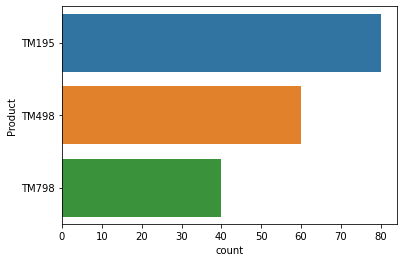

In [431]:
sns.countplot(data = data, y='Product');

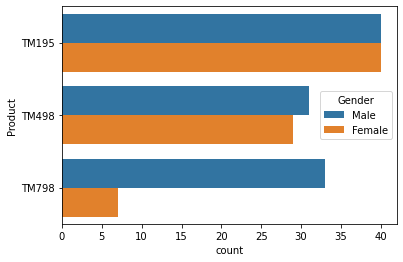

In [432]:
sns.countplot(data = data, y='Product', hue='Gender');  # Doing a split of the counts by Gender

In [433]:
#Creating a Frequency Table by Product

product_count = pd.crosstab(index=data['Product'],columns='count')  
product_pct = pd.crosstab(index=data['Product'],columns='Pct').apply(lambda x: round(x/len(data)*100,0), axis=1)
product = pd.concat([product_count,product_pct],axis=1)
product.sort_values(by='Pct',ascending=False)

col_0,count,Pct
Product,,
TM195,80,44.00
TM498,60,33.00
TM798,40,22.00


### Observations: 
1. TM195 is the most popular Product followed by TM498
2. TM798 is the least popular Product
2. TM798 is mostly popular among Males

## 2.2 Let us analyze the dataset by age of customers

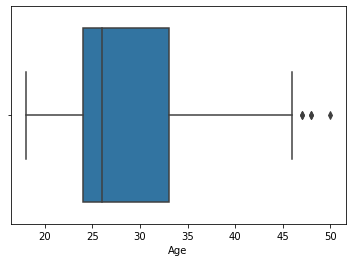

In [434]:
sns.boxplot(data = data, x ='Age');

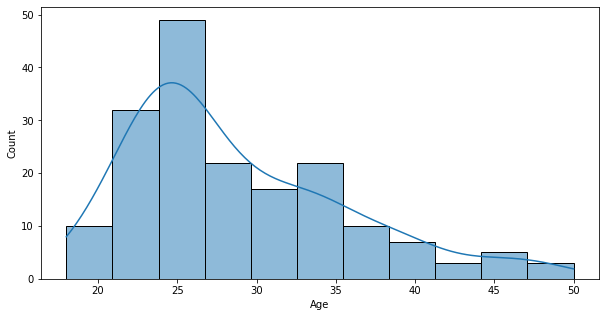

In [435]:
plt.figure(figsize=(10, 5))
sns.histplot(data = data, x = 'Age',kde=True,bins='auto');
plt.show()

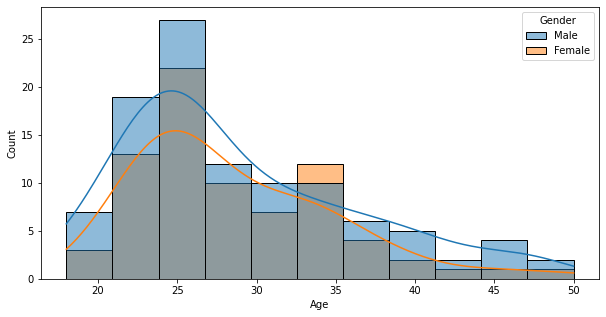

In [436]:
plt.figure(figsize=(10, 5))
sns.histplot(data = data, x = 'Age',hue = 'Gender',kde=True,bins='auto');
plt.show()

# Added hue of Gender

### Observations: 
1. Customers tend to be more older than younger
2. Age data is skewed to the right with a longer tail (with some outliers)
3. Age distribution is identical for both Males and Females

## 2.3 Let us analyze the dataset by Gender of customers

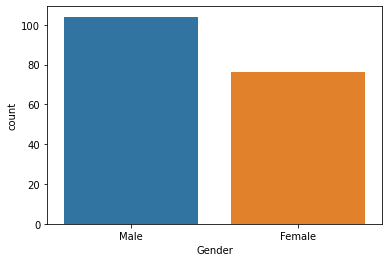

In [437]:
sns.countplot(data = data, x='Gender');

In [438]:
#Creating a Frequency Table by Gender

gender_count = pd.crosstab(index=data["Gender"],columns="count")  
gender_pct = pd.crosstab(index=data["Gender"],columns='Pct').apply(lambda x: round(x/len(data)*100,0), axis=1)
gender = pd.concat([gender_count,gender_pct],axis=1)
gender.sort_values(by='Pct',ascending=False)

col_0,count,Pct
Gender,,
Male,104,58.00
Female,76,42.00


### Observations:
1. 58% of customers are Males and 42% are Females

## 2.4 Let us analyze the dataset by Education of customers

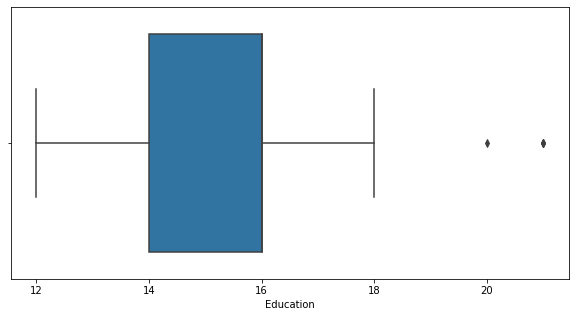

In [439]:
plt.figure(figsize=(10, 5))
sns.boxplot(data = data, x ='Education');
plt.show()

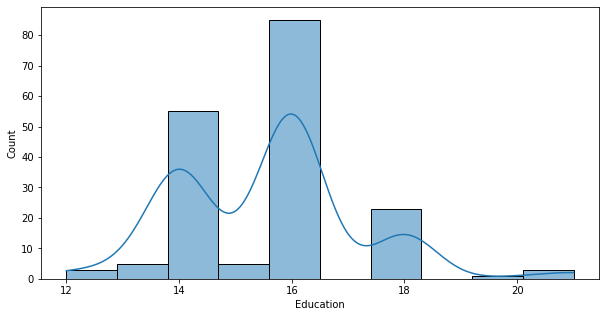

In [440]:
plt.figure(figsize=(10, 5))
sns.histplot(data = data, x = 'Education',kde=True,bins=10);
plt.show()

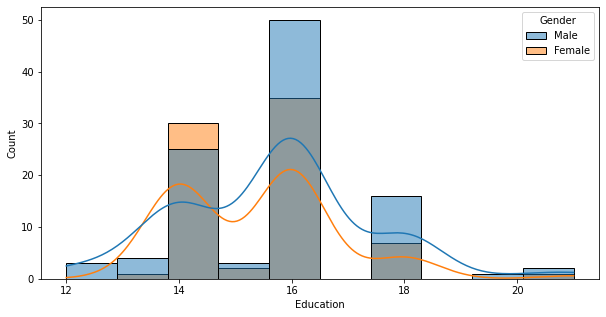

In [441]:
plt.figure(figsize=(10, 5))
sns.histplot(data = data, x = 'Education',hue = 'Gender',kde=True,bins=10);
plt.show()

# Added hue of Gender

### Let's categorize education as follows

1. No College - Upto 12 years of schooling
2. Some College - Above 12 and below 16 years of schooling
3. College Degree - 16 years of schooling
3. Advanced Degree - Above 16 years of schooling


We will add a new custom column 'EduCat' to categorize the Educational Background of the user


In [442]:
# create a function that will categorize education by passing the number of years of education

def eval_edu_cat(years):
    if (years > 16):
        edu_cat = 'Advanced Degree'
    elif (years == 16):
        edu_cat = 'College Graduate'
    elif (years < 16) & (years > 12):
        edu_cat = 'Some College'
    else:
        edu_cat = 'No College'
        
    return edu_cat
        
# Add a new column 'EduCat' to the DataFrame and assign the values using the eval_edu_cat function
for i in range(len(data)):
    #print(int(data.loc[i,['Education']])
    data.loc[i,['EduCat']] = eval_edu_cat(int(data.loc[i,['Education']]))   

In [443]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
 9   EduCat         180 non-null    object
dtypes: int64(6), object(4)
memory usage: 14.2+ KB


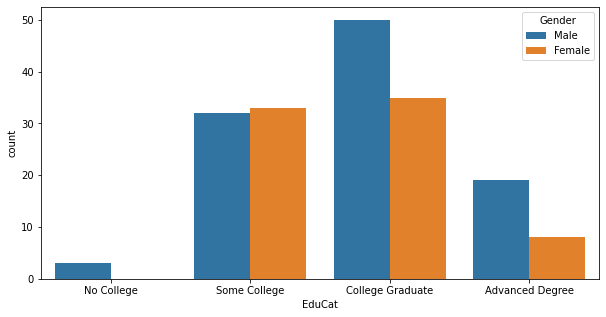

In [444]:
# Create a count plot based on the new column 'EduCat'

educat_index = ['No College','Some College','College Graduate','Advanced Degree']

plt.figure(figsize=(10, 5))
sns.countplot(data = data, x = 'EduCat',order = educat_index, hue = 'Gender')
plt.show()

In [445]:
#Creating a Frequency Table by EduCat

educat_count = pd.crosstab(index=data["EduCat"],columns="count")  
educat_pct = pd.crosstab(index=data["EduCat"],columns='Pct').apply(lambda x: round(x/len(data)*100,0), axis=1)
educat = pd.concat([educat_count,educat_pct],axis=1)
educat.sort_values(by='Pct',ascending=False)

col_0,count,Pct
EduCat,,
College Graduate,85,47.00
Some College,65,36.00
Advanced Degree,27,15.00
No College,3,2.00


### Observations:
1. Education of customers are spread over a wider range (with a few outliers)
2. Majority of customers have some college education or more
3. College graduates are more than half the population
4. All Females have some collge or higher
5. Males have a higher share of College Graduates and Advanced Degrees

## 2.5 Let us analyze the dataset by Marital Status of customers

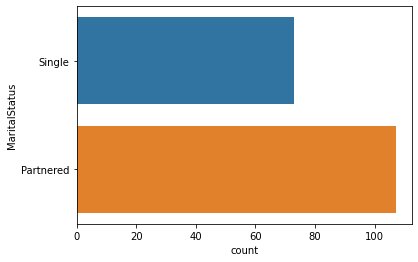

In [446]:
sns.countplot(data = data, y='MaritalStatus');

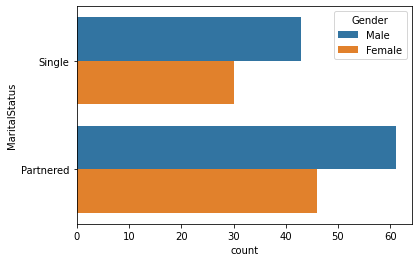

In [447]:
sns.countplot(data = data, y='MaritalStatus', hue='Gender');  # Doing a split of the counts by Gender

In [448]:
#Creating a Frequency Table by Marital Status

ms_count = pd.crosstab(index=data["MaritalStatus"],columns="Count")  
ms_pct = pd.crosstab(index=data["MaritalStatus"],columns='Pct').apply(lambda x: round(x/len(data)*100,0), axis=1)
maritalstatus = pd.concat([ms_count,ms_pct],axis=1)
maritalstatus.sort_values(by='Pct',ascending=False)

col_0,Count,Pct
MaritalStatus,,
Partnered,107,59.00
Single,73,41.00


### Observations:
1. 59% of customers are Partnered and 41% are Single
2. Both Males and Females have identical profiles

## 2.6 Let us analyze the dataset by Usage

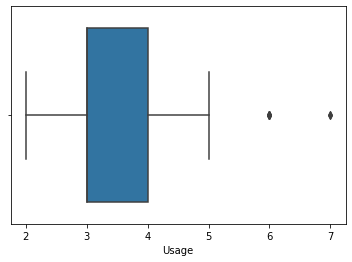

In [449]:
sns.boxplot(data = data, x ='Usage');

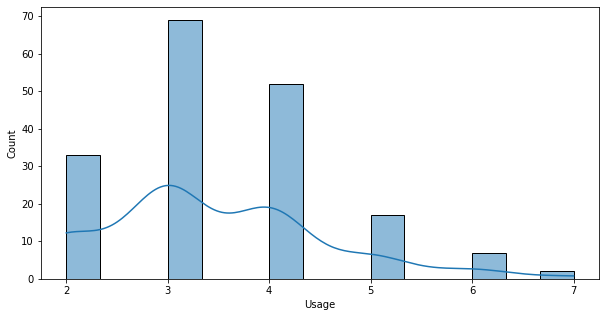

In [450]:
plt.figure(figsize=(10, 5))
sns.histplot(data = data, x = 'Usage',kde=True,bins='auto');
plt.show()

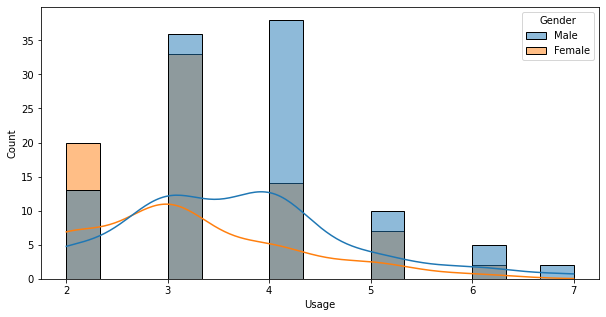

In [451]:
plt.figure(figsize=(10, 5))
sns.histplot(data = data, x = 'Usage',hue = 'Gender',kde=True,bins='auto');
plt.show()

# Added hue of Gender

### Observations: 
1. Customers' Usage is mainly from 2 weeks to 4 weeks
2. Males tend be using the Products more per week than Females

## 2.7 Let us analyze the dataset by Fitness

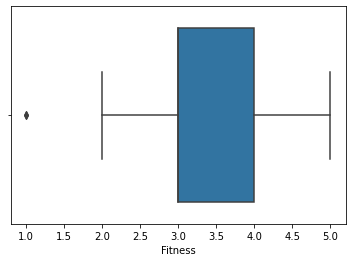

In [452]:
sns.boxplot(data = data, x ='Fitness');

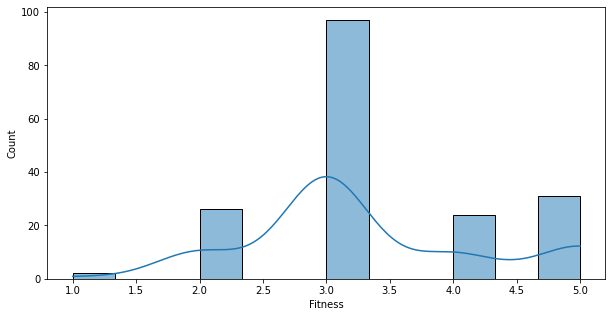

In [453]:
plt.figure(figsize=(10, 5))
sns.histplot(data = data, x = 'Fitness',kde=True,bins='auto');
plt.show()

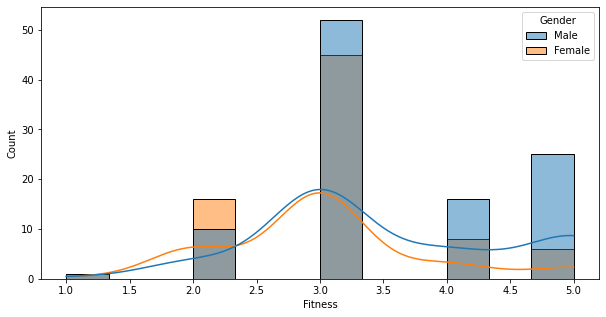

In [454]:
plt.figure(figsize=(10, 5))
sns.histplot(data = data, x = 'Fitness',hue = 'Gender',kde=True,bins='auto');
plt.show()

# Added hue of Gender

### Observations: 
1. Customers' Fitness ranges from 1 to 5
2. Males tend to have a larger slice of above average fit individuals
3. Females are more normally distributed


## 2.7 Let us analyze the dataset by Fitness

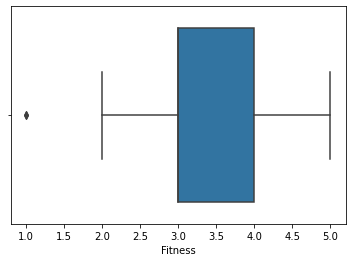

In [455]:
sns.boxplot(data = data, x ='Fitness');

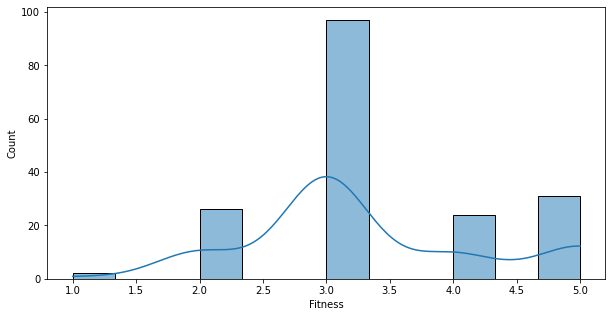

In [456]:
plt.figure(figsize=(10, 5))
sns.histplot(data = data, x = 'Fitness',kde=True,bins='auto');
plt.show()

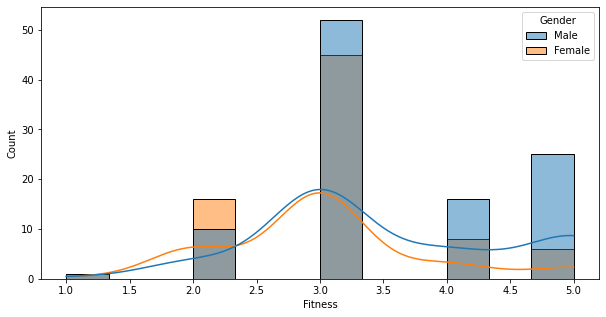

In [457]:
plt.figure(figsize=(10, 5))
sns.histplot(data = data, x = 'Fitness',hue = 'Gender',kde=True,bins='auto');
plt.show()

# Added hue of Gender

### Observations: 
1. Customers' Fitness ranges from 1 to 5
2. Males tend to have a larger slice of above average fit individuals
3. Females are more normally distributed


## 2.8 Let us analyze the dataset by Income


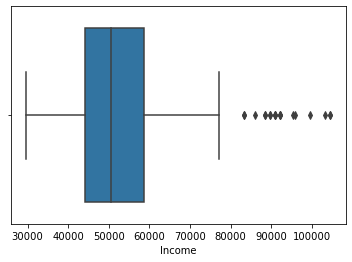

In [458]:
sns.boxplot(data = data, x ='Income');

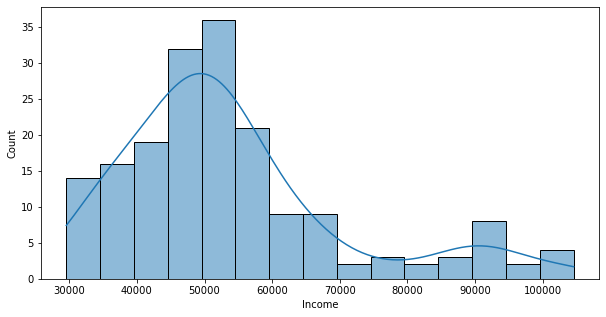

In [459]:
plt.figure(figsize=(10, 5))
sns.histplot(data = data, x = 'Income',kde=True,bins='auto');
plt.show()

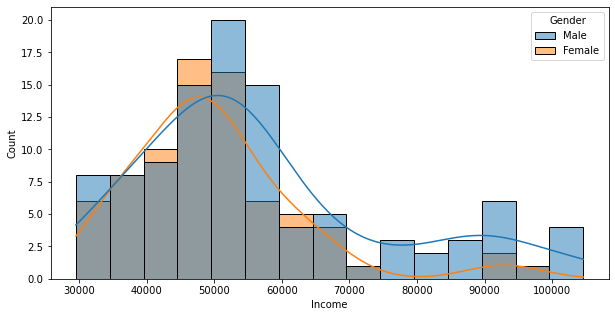

In [460]:
plt.figure(figsize=(10, 5))
sns.histplot(data = data, x = 'Income',hue = 'Gender',kde=True,bins='auto');
plt.show()

# Added hue of Gender

### Let's categorize income as follows

1. LT 50K - Upto 50,000
2. 50K - 100K - Above 50,000 and upto 100,000
3. GT 100K - Above 100,000



We will add a new custom column 'IncomeCat' to categorize the Anual Income of the user

In [461]:
# create a function that will categorize income by passing the annual income of the customer

def eval_inc_cat(income):
    if (income > 100000):
        inc_cat = 'GT 100K'
    elif (income > 50000):
        inc_cat = '50K - 100K'
    else:
        inc_cat = 'LT 50K'
        
    return inc_cat
        
#Add a new column 'IncomeCat' to the DataFrame and assigning values using the eval_inc_cat function
for i in range(len(data)):
    #print(int(data.loc[i,['Education']])
    data.loc[i,['IncomeCat']] = eval_inc_cat(int(data.loc[i,['Income']]))   

In [462]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
 9   EduCat         180 non-null    object
 10  IncomeCat      180 non-null    object
dtypes: int64(6), object(5)
memory usage: 15.6+ KB


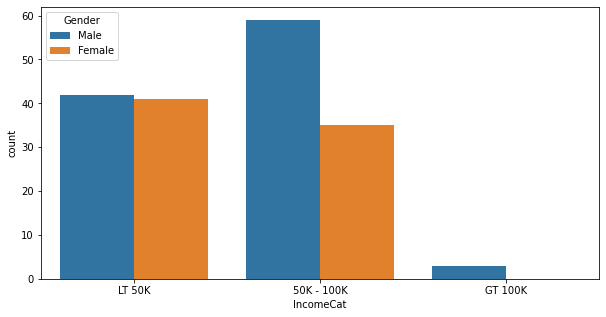

In [463]:
#Create a count plot using the new 'IncomeCat' column

inccat_index = ['LT 50K','50K - 100K','GT 100K']

plt.figure(figsize=(10, 5))
sns.countplot(data = data, x = 'IncomeCat',order = inccat_index, hue = 'Gender')
plt.show()

### Observations: 
1. Customers'Income appears to be skewed heavily to the right due to several outliers
2. Males and Females have identical Income profiles in the first half of the dataset
3. Males have a significantly higher income compared to Females in the second half of the dataset


## 2.9 Let us analyze the dataset by Miles


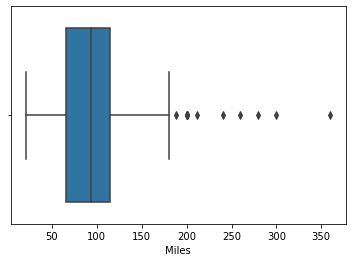

In [464]:
sns.boxplot(data = data, x ='Miles');

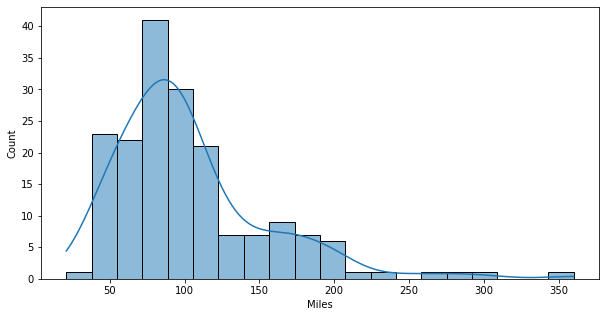

In [465]:
plt.figure(figsize=(10, 5))
sns.histplot(data = data, x = 'Miles',kde=True,bins='auto');
plt.show()

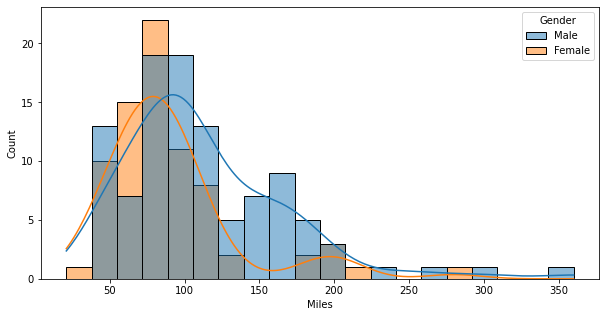

In [466]:
plt.figure(figsize=(10, 5))
sns.histplot(data = data, x = 'Miles',hue = 'Gender',kde=True,bins='auto');
plt.show()

# Added hue of Gender

### Observations: 
1. Customers' expected Miles to run is signficantly slewed to the right (due to several outliers)
2. The skewness for msot part is due to Males 
3. Females also have some right skewness, but not much compared to that of Males


# 3. Multivariate Analysis

## 3.1 Let's start with doing a pairplot and correlation of all the numerical variables in the dataset

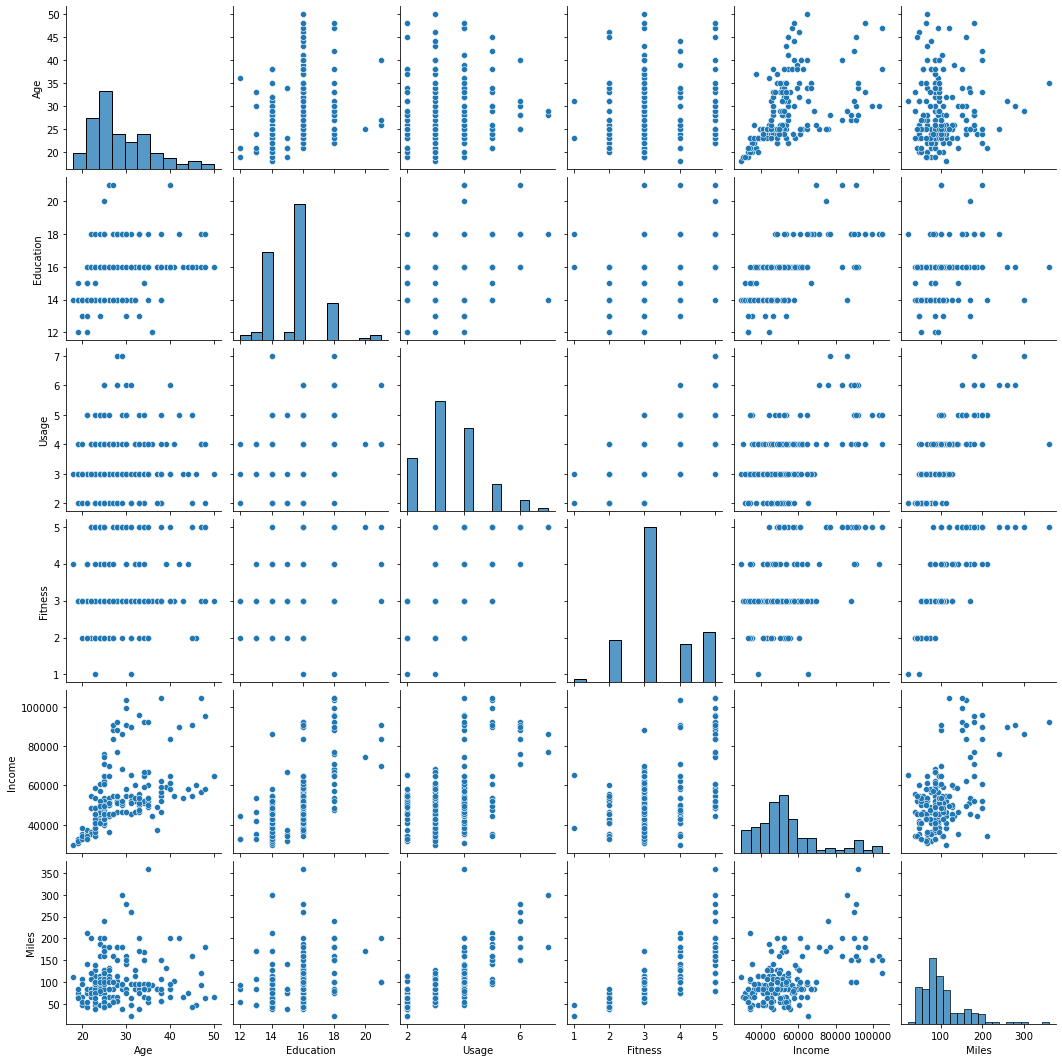

In [467]:
sns.pairplot(data);

In [468]:
data.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.00,0.28,0.02,0.06,0.51,0.04
Education,0.28,1.00,0.40,0.41,0.63,0.31
Usage,0.02,0.40,1.00,0.67,0.52,0.76
Fitness,0.06,0.41,0.67,1.00,0.54,0.79
Income,0.51,0.63,0.52,0.54,1.00,0.54
Miles,0.04,0.31,0.76,0.79,0.54,1.00


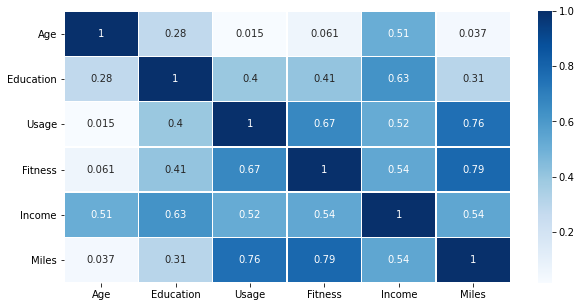

In [469]:
# Do a heatmap for all customers 

plt.figure(figsize=(10, 5))
sns.heatmap(data.corr(),annot=True, linewidths=.5, cmap = 'Blues');
plt.show()

### Observations

1. Income has some correlation with Age (0.51)and high correlation with Education (0.63)
2. Income also has some correlation with Usage (0.52), Fitness (0.54), and Miles (0.54)
3. Usage has a higher correlation with Fitness (0.67) and Miles (0.76). 

### Interpretation
1. Higher Income customers tend be older and have a higher education level
2. Highr Income customers also tend to use the product more, also consider themselves to be more fitter, and have a higher expected Miles to run 
3. Usage of the Product is more or those customers who consider themseleves to be more fitter and have a higher expected Miles to run


## 3.2 Let's breakdown the above observations by Gender

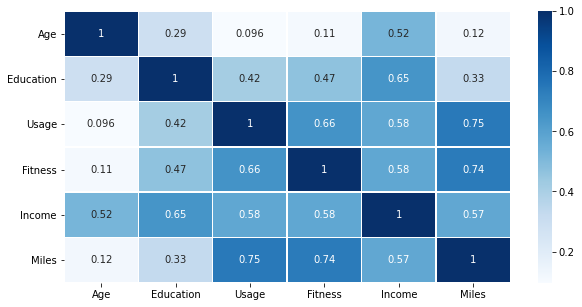

In [470]:
#Heatmap for Male customers

data_male = data[data['Gender']=='Male']

plt.figure(figsize=(10, 5))
sns.heatmap(data_male.corr(),annot=True, linewidths=.5, cmap = 'Blues');
plt.show()

### Observations - Male Customers
1. Higher Income Males tend be older and have a higher education level
2. Higher Income Males also tend to use the product more, also consider themselves to be more fitter, and have a higher expected Miles to run 
3. Usage of the Product is more for Males who consider themseleves to be more fitter and have a higher expected Miles to run

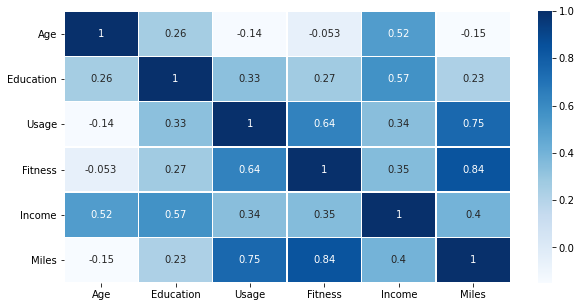

In [471]:
#Heatmap for Female customers

data_female = data[data['Gender']=='Female']

plt.figure(figsize=(10, 5))
sns.heatmap(data_female.corr(),annot=True, linewidths=.5, cmap = 'Blues');
plt.show()


### Observations - Female Customers
1. Higher Income Females tend be older and have a higher education level (similar to Males) 
2. Unlike Males, High Income Females do not necessarily use the Product more, or consider themselves fitter or have a higher expected Miles to run
3. Usage of the Product is more for Females who consider themseleves to be more fitter and have a higher expected Miles to run

## 3.3 Let's analyze the various features by Product

### Visualizing Product usage by Gender

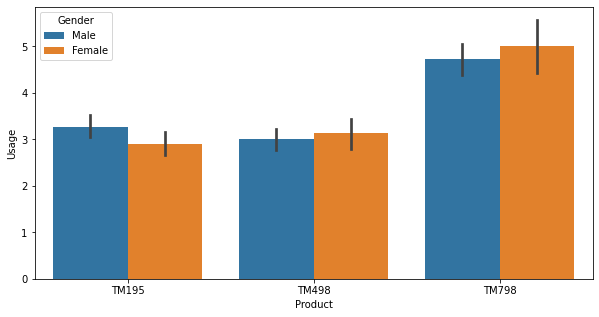

In [472]:
plt.figure(figsize=(10, 5))
sns.barplot(x=data['Product'], y=data['Usage'], hue=data['Gender']);
plt.show()

### Visualizing Product usage by Education Category

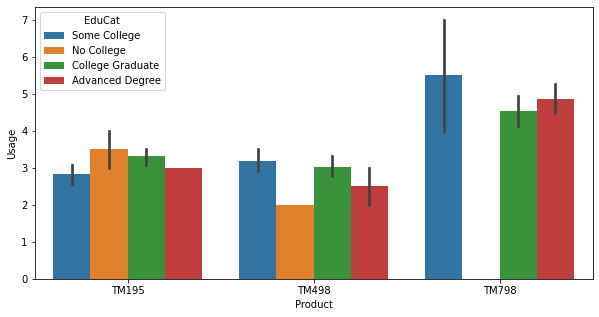

In [473]:
plt.figure(figsize=(10, 5))
sns.barplot(x=data['Product'], y=data['Usage'], hue=data['EduCat']);
plt.show()

### Visualizing Product usage for Males

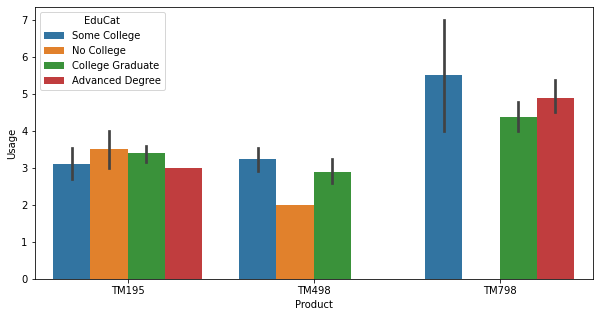

In [474]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Product', y='Usage', data = data[data['Gender']=='Male'], hue=data['EduCat']);
plt.show()

### Visualizing Product usage for Females

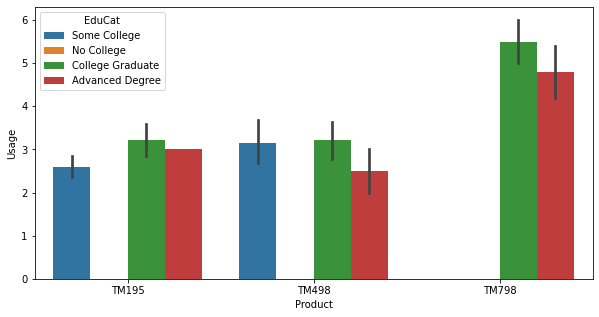

In [475]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Product', y='Usage', data = data[data['Gender']=='Female'], hue=data['EduCat']);
plt.show()

### Visualizing Product usage by Income Category

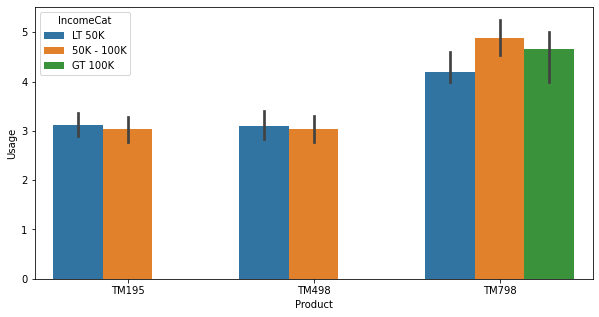

In [476]:
plt.figure(figsize=(10, 5))
sns.barplot(x=data['Product'], y=data['Usage'], hue=data['IncomeCat']);
plt.show()

### Observations 
1. TM798 is used by both Males and Females with atleast some college degree
2. TM798 is also the only preferred product with customers in the highest income bracket

## 3.4 Let's analyze the various features by Income

### Visualizing Income with Age

<Figure size 720x360 with 0 Axes>

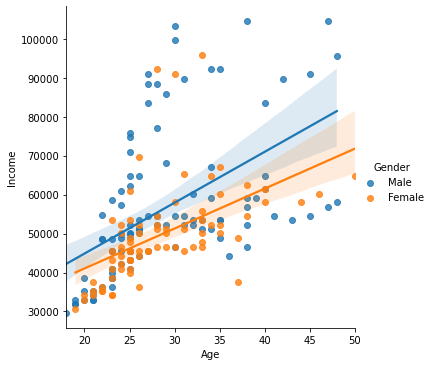

In [483]:
plt.figure(figsize=(10, 5))
sns.lmplot(y="Income", x="Age", data=data, hue='Gender');
plt.show()

### Visualizing Income with Education

<Figure size 720x360 with 0 Axes>

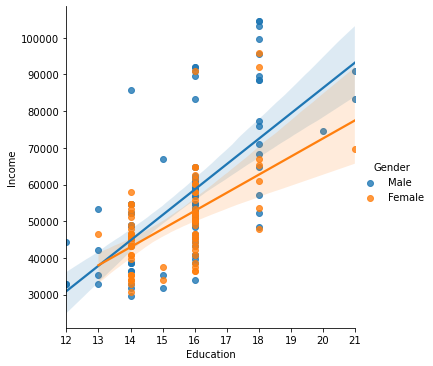

In [491]:
plt.figure(figsize=(10, 5))
sns.lmplot(y="Income", x="Education", data=data, hue='Gender');
plt.show()

### Visualizing Income with Usage

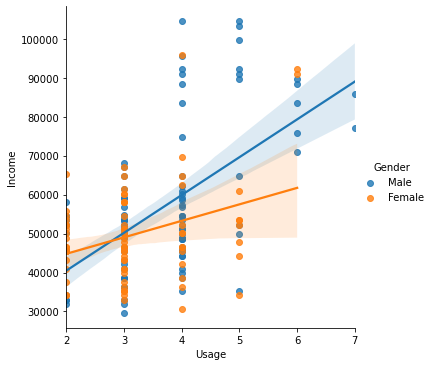

In [479]:
sns.lmplot(y="Income", x="Usage", data=data, hue='Gender');

### Visualizing Income with Fitness

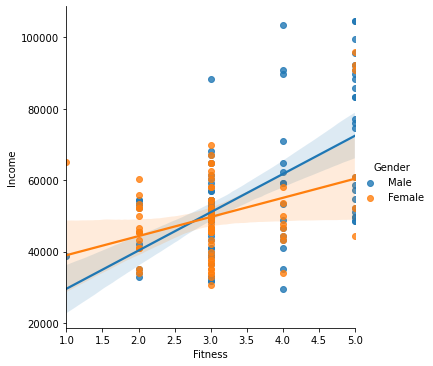

In [482]:
sns.lmplot(y="Income", x="Fitness", data=data, hue='Gender');

### Visualizing Income with Miles

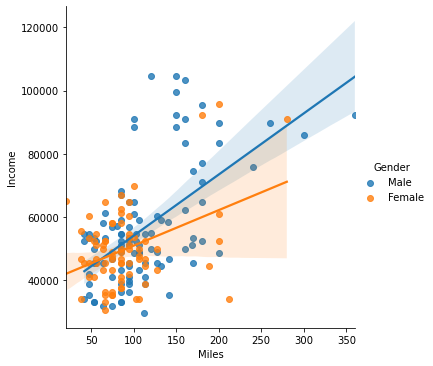

In [481]:
sns.lmplot(y="Income", x="Miles", data=data, hue='Gender');

### Observations: 
1. For Males, Income is highly correlated with Age, Education, Usage, Fitness,and Miles 
2. For Females, Income is highly correlated with Age and Education

# 4. Conclusion



1. We observe that in general, the customers of Cardio Good Fitness tend to be slightly more older than younger for both genders 
2. The customers are also slightly more partnered than single for both genders
3. We also observe that the income of customers have a high level of correlation with Age and education. Meaning older and well educated customers tend to have a higher income.
4. Also we observe that Male customers with higher income tend to use the products more, consider them to be more fitter and expect to run more miles
5. Female customers also show income to age and education correlation. But their usage, fitness and expected miles don't show much correlation with income
6. Finally we also observe that 'TM798' Product is highly preferred by customers with college defrees and also the only preference for customers in the highest income bracket (over 100K)


# 5. Recommendations

1. Older Males with high income and college degree is a target market for selling TM798
2. High income males who consider themselves more fit are likely to be heavy users of the Cardio products
3. For Females who consider themselves fitter and expect more miles tend to be heavy users of the Cardio products irrespective of their income.
